## Downloading and extracting Dataset

In [1]:
!kaggle datasets download -d fedesoriano/heart-failure-prediction -p /content/Dataset1

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
License(s): ODbL-1.0
  0% 0.00/8.56k [00:00<?, ?B/s]
100% 8.56k/8.56k [00:00<00:00, 15.2MB/s]


In [2]:
!unzip /content/Dataset1/heart-failure-prediction.zip -d /content/Dataset1/

Archive:  /content/Dataset1/heart-failure-prediction.zip
  inflating: /content/Dataset1/heart.csv  


In [220]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras import Model,Sequential
from tensorflow.keras.layers import Dense, Dropout

## Data Pre-Processing

In [221]:
df = pd.read_csv("/content/Dataset1/heart.csv")
print(df.shape)

# Removing Outliers and replacing value with Mean
for col in ['RestingBP', 'Cholesterol']:
  if df[col].min() == 0 :
    mean_value = df[col][df[col] != 0].mean()
    df.loc[df[col]==0, col] = mean_value

df.head()

(918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0


In [222]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.540894,244.635389,0.233115,136.809368,0.887364,0.553377
std,9.432617,17.989932,53.318029,0.423046,25.460334,1.066570,0.497414
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,244.635389,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [223]:
# Separating Feature Vectors and Labels
x = df[df.columns[:-1]]
y = df[df.columns[-1]]

# One Hot Encoding Features : with < 10 classes
x = pd.get_dummies(x, prefix=list(x.columns[x.nunique() < 10]), columns=list(x.columns[x.nunique() < 10]))

# Z Score Normalization to all features
scaler = StandardScaler()
x = scaler.fit_transform(x)

x = x.astype('float32')
x

array([[-1.4331398 ,  0.4148527 ,  0.83252877, ..., -0.27144834,
        -1.002181  ,  1.150674  ],
       [-0.4784836 ,  1.5271916 , -1.2129222 , ..., -0.27144834,
         0.9978237 , -0.86905587],
       [-1.7513585 , -0.14131679,  0.7199352 , ..., -0.27144834,
        -1.002181  ,  1.150674  ],
       ...,
       [ 0.37009972, -0.14131679, -2.132437  , ..., -0.27144834,
         0.9978237 , -0.86905587],
       [ 0.37009972, -0.14131679, -0.1620483 , ..., -0.27144834,
         0.9978237 , -0.86905587],
       [-1.6452856 ,  0.30361882, -1.3067503 , ..., -0.27144834,
        -1.002181  ,  1.150674  ]], dtype=float32)

In [224]:
x[0]

array([-1.4331398 ,  0.4148527 ,  0.83252877,  1.3829283 , -0.8324324 ,
       -0.5159524 ,  0.5159524 , -1.0841382 ,  2.0751767 , -0.53283775,
       -0.22967868,  0.55134135, -0.55134135, -0.5074783 ,  0.8142748 ,
       -0.49044934,  0.8235563 , -0.8235563 , -0.27144834, -1.002181  ,
        1.150674  ], dtype=float32)

### Splitting Data into Train and Test

In [231]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=43)
print(x_train.shape)
print(x_test.shape)

(734, 21)
(184, 21)


## Training Model and Evaluating Performance

In [232]:
model = Sequential([
    Dense(8,activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.02)),
    Dense(4,activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.02)),
    Dense(1,activation='sigmoid')
])

In [233]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.01),loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [234]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
19/19 [==============================] - 2s 20ms/step - loss: 0.9348 - accuracy: 0.6014 - val_loss: 0.7569 - val_accuracy: 0.8503
Epoch 2/50
19/19 [==============================] - 0s 4ms/step - loss: 0.6842 - accuracy: 0.8450 - val_loss: 0.5945 - val_accuracy: 0.8776
Epoch 3/50
19/19 [==============================] - 0s 4ms/step - loss: 0.5699 - accuracy: 0.8603 - val_loss: 0.5134 - val_accuracy: 0.8776
Epoch 4/50
19/19 [==============================] - 0s 4ms/step - loss: 0.5094 - accuracy: 0.8586 - val_loss: 0.4753 - val_accuracy: 0.8776
Epoch 5/50
19/19 [==============================] - 0s 4ms/step - loss: 0.4737 - accuracy: 0.8552 - val_loss: 0.4438 - val_accuracy: 0.8776
Epoch 6/50
19/19 [==============================] - 0s 3ms/step - loss: 0.4508 - accuracy: 0.8688 - val_loss: 0.4279 - val_accuracy: 0.8707
Epoch 7/50
19/19 [==============================] - 0s 4ms/step - loss: 0.4368 - accuracy: 0.8637 - val_loss: 0.4168 - val_accuracy: 0.8707
Epoch 8/50
19/19 [=

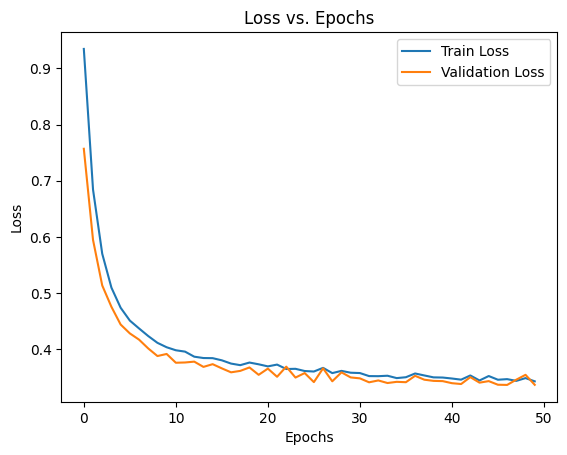

In [235]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

In [236]:
loss,accuracy = model.evaluate(x_test, y_test)
print("Loss: ",loss)
print("Accuracy: ",accuracy)

6/6 [==============================] - 0s 3ms/step - loss: 0.4339 - accuracy: 0.8424
Loss:  0.43391647934913635
Accuracy:  0.842391312122345
